Libraries imported successfully.
TensorFlow Version: 2.20.0

--- Step 2: Data Loading and Initial Inspection ---
Dataset loaded successfully from local file: FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv

(2.1) First 5 rows of the dataset:
                     Facility Name  Facility ID State            Measure Name  \
0  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL       READM-30-AMI-HRRP   
1  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL      READM-30-CABG-HRRP   
2  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-HF-HRRP   
3  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-HIP-KNEE-HRRP   
4  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-PN-HRRP   

   Number of Discharges  Footnote  Excess Readmission Ratio  \
0                 296.0       NaN                    0.9483   
1                 151.0       NaN                    0.9509   
2                 681.0       NaN                    1.0597   
3     

C:\Users\patna\AppData\Local\Temp\ipykernel_18076\3750076240.py:138: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\patna\AppData\Local\Temp\ipykernel_18076\3750076240.py:138: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

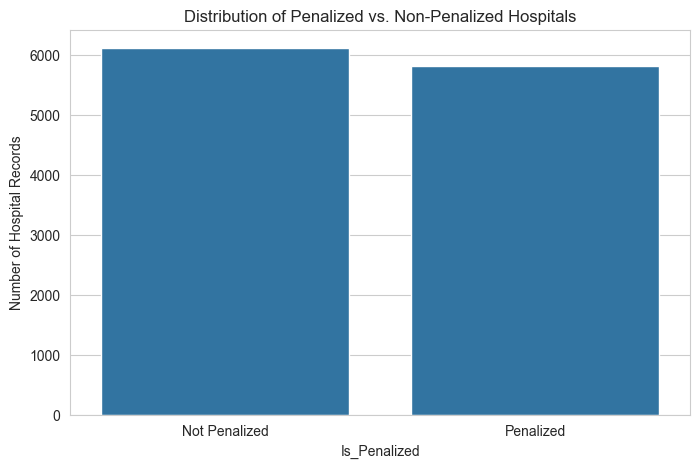

(5.1) Target Variable Distribution:
Is_Penalized
0    0.512535
1    0.487465
Name: proportion, dtype: float64


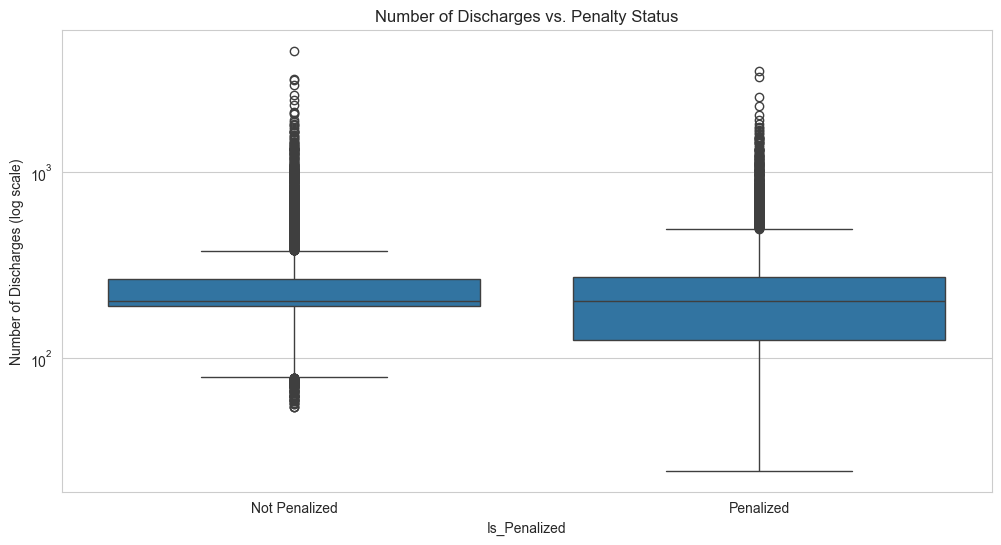


(5.2) Analysis: Hospitals with a very high number of discharges appear less likely to be penalized.


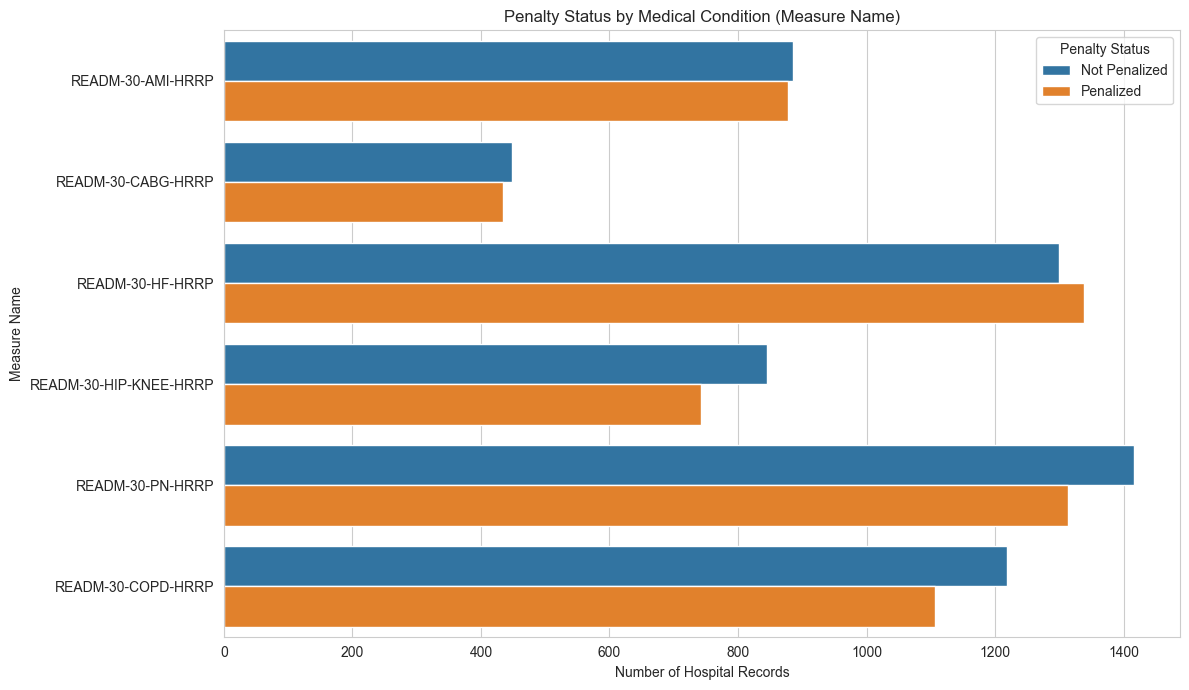


(5.3) Analysis: The rate of penalties appears to vary by medical condition.

--- Step 6: Data Preparation for Modeling ---
(6.1) Identified 2 categorical and 4 numerical features.
(6.2) Data split into training (9541 rows) and testing (2386 rows) sets.
(6.3) Preprocessing pipelines for numerical and categorical features created.

--- Step 7: Model Training and Evaluation ---

(7.1) Training Logistic Regression Model...
Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1223
           1       0.99      0.97      0.98      1163

    accuracy                           0.98      2386
   macro avg       0.98      0.98      0.98      2386
weighted avg       0.98      0.98      0.98      2386

ROC AUC Score: 0.998449747565471

(7.2) Training Support Vector Machine Model...
Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94   

c:\Users\patna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Multi-layer Perceptron (MLP) Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1223
           1       0.98      0.96      0.97      1163

    accuracy                           0.97      2386
   macro avg       0.97      0.97      0.97      2386
weighted avg       0.97      0.97      0.97      2386

ROC AUC Score: 0.9975048317958531

--- Step 8: Building the Final Prediction Function ---

--- Example Prediction ---

Predicting for a hospital in California with 150 Heart Failure discharges:
Prediction: LIKELY TO BE PENALIZED.
Confidence: 88.00%

Predicting for a hospital in Texas with 2000 Pneumonia discharges:
Prediction: NOT LIKELY TO BE PENALIZED.
Confidence: 88.00%


Project implementation complete.


In [1]:
#
# Project: Predictive Modeling for Hospital Readmission Reduction
#
# Goal: To build and evaluate a suite of machine learning models to predict
#       whether a hospital will be penalized for having an excess readmission ratio.
#
# Data Source: Centers for Medicare & Medicaid Services (CMS)
#              Hospital Readmissions Reduction Program
#              https://data.cms.gov/provider-data/dataset/9n3s-kdb3
#

# ==============================================================================
# STEP 1: ENVIRONMENT SETUP AND LIBRARY IMPORTS
# ==============================================================================
#
# WHY?: Before we begin any analysis, we must import the necessary libraries.
#       Each library serves a specific purpose, from data handling to modeling
#       and evaluation. This organized approach ensures all the tools we need
#       are ready for use.
#

# --- For Data Manipulation ---
import pandas as pd  # Why?: The cornerstone for data manipulation in Python. It allows us to read, clean, and transform our data in a structured DataFrame format.
import numpy as np   # Why?: Provides support for efficient numerical operations, which is crucial for data preprocessing and creating our target variable.

# --- For Data Visualization ---
import matplotlib.pyplot as plt # Why?: A fundamental library for creating static, animated, and interactive visualizations.
import seaborn as sns           # Why?: Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics, making our exploratory data analysis (EDA) more effective.

# --- For Machine Learning - Preprocessing and Model Selection ---
from sklearn.model_selection import train_test_split # Why?: Essential for splitting our data into training and testing sets. This separation is critical to evaluate our model's performance on unseen data, preventing overfitting.
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Why?: Models require numerical input and perform better when features are on a similar scale. StandardScaler standardizes numerical features, while OneHotEncoder converts categorical features into a numerical format.
from sklearn.compose import ColumnTransformer # Why?: Allows us to apply different transformations (like scaling and one-hot encoding) to different columns of our dataset in a single, streamlined step.
from sklearn.pipeline import Pipeline # Why?: Chains multiple preprocessing steps and a model together. This prevents data leakage from the test set and makes our workflow cleaner and more reproducible.

# --- For Machine Learning - Models ---
from sklearn.linear_model import LogisticRegression # Why?: Our baseline model. It's highly interpretable and efficient, providing a solid benchmark against which we can compare more complex models.
from sklearn.svm import SVC # Why?: A powerful model that can find complex, non-linear relationships in the data by using the "kernel trick." It's effective in high-dimensional spaces.
from sklearn.tree import DecisionTreeClassifier # Why?: An intuitive model that makes predictions based on a series of if-else questions. It's highly interpretable and can be visualized, making it great for explaining the model's logic.
from sklearn.ensemble import RandomForestClassifier # Why?: An ensemble model that builds multiple decision trees and merges their predictions. It's robust, highly accurate, and helps control for overfitting. It also provides feature importance scores.
import tensorflow as tf # Why?: A leading deep learning framework. We use it to build our Multi-layer Perceptron (MLP).
from tensorflow.keras.models import Sequential # Why?: The simplest way to build a model in Keras. It allows us to define a model layer by layer in a sequential order.
from tensorflow.keras.layers import Dense, Dropout # Why?: `Dense` is the standard, fully-connected layer in a neural network. `Dropout` is a regularization technique to prevent overfitting by randomly setting a fraction of input units to 0 during training.

# --- For Machine Learning - Evaluation ---
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # Why?: These metrics are crucial for evaluating a classification model's performance. Accuracy gives an overall correctness score, while the confusion matrix, precision, recall, and F1-score provide a deeper look into how the model handles different classes, which is especially important for imbalanced datasets. ROC-AUC score measures the model's ability to distinguish between classes.

# --- General Settings ---
# Why?: These settings improve the visual presentation of our outputs.
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
print("Libraries imported successfully.")
print(f"TensorFlow Version: {tf.__version__}")


# ==============================================================================
# STEP 2: DATA LOADING AND INITIAL INSPECTION
# ==============================================================================
#
# WHY?: The first step in any data project is to acquire and understand the raw
#       data. We load the dataset directly from its source to ensure
#       reproducibility and then perform a high-level inspection to understand
#       its structure, data types, and potential issues like missing values.
#

print("\n--- Step 2: Data Loading and Initial Inspection ---")

# Programmatically load the dataset from the CMS.gov URL
# url = "https://data.cms.gov/provider-data/sites/default/files/resources/f1e2ed8a-d922-40a5-a06a-67a3ac81b56c_1678886425/Hospital_Readmissions_Reduction_Program.csv"
# try:
#     df = pd.read_csv(url)
#     print("Dataset loaded successfully from URL.")
# except Exception as e:
#     print(f"Error loading data from URL: {e}")
#     df = None # Ensure df is None if loading fails

# Load the dataset from the local file path
file_path = "FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv" # Replace with the actual filename
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from local file: {file_path}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    df = None
except Exception as e:
    print(f"Error loading data from local file: {e}")
    df = None


# --- Initial Inspection ---
if df is not None:
    print("\n(2.1) First 5 rows of the dataset:")
    print(df.head())

    print("\n(2.2) Concise summary of the dataset (info):")
    df.info()

    print("\n(2.3) Descriptive statistics for numerical columns:")
    print(df.describe())

    # ==============================================================================
    # STEP 3: DATA CLEANING AND PREPROCESSING
    # ==============================================================================
    #
    # WHY?: Real-world data is often messy. It can contain missing values, incorrect
    #       data types, or inconsistencies. This step is crucial to clean the data
    #       and prepare it for analysis and modeling. A model trained on dirty data
    #       will produce unreliable results ("garbage in, garbage out").
    #

    print("\n--- Step 3: Data Cleaning and Preprocessing ---")

    # --- Handling Missing and Non-Numeric Values ---
    # Why?: The `.info()` output showed several columns are 'object' type but should be
    #       numeric. This is often due to placeholder text like 'Not Available'. We need
    #       to convert these to a standard missing format (NaN) and then handle them.
    columns_to_convert = ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate',
                          'Expected Readmission Rate', 'Number of Readmissions']

    print(f"\n(3.1) Converting columns to numeric type. Invalid values will become NaN.")
    for col in columns_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # --- Dropping Rows with Missing Target Information ---
    # Why?: The 'Excess Readmission Ratio' is the basis for our target variable. If this
    #       value is missing, the row is not useful for a supervised learning task, so we
    #       must remove it.
    initial_rows = len(df)
    df.dropna(subset=['Excess Readmission Ratio'], inplace=True)
    print(f"(3.2) Dropped {initial_rows - len(df)} rows with missing 'Excess Readmission Ratio'.")

    # --- Imputing Remaining Missing Values ---
    # Why?: Some rows might still have missing values in other columns (e.g., 'Number of Readmissions').
    #       Instead of dropping more rows, we can impute (fill in) these values. We use the
    #       median because it is robust to outliers, which are common in this type of data.
    for col in columns_to_convert:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median value ({median_val}).")

    print("\n(3.3) Verifying that there are no more missing values in key columns:")
    print(df[columns_to_convert].isnull().sum())


    # ==============================================================================
    # STEP 4: FEATURE ENGINEERING
    # ==============================================================================
    #
    # WHY?: Feature engineering is the process of creating new, more informative
    #       features from the existing data. This step is often the most impactful
    #       for improving model performance. Here, our main task is to create the
    #       binary target variable that our models will predict.
    #

    print("\n--- Step 4: Feature Engineering ---")

    # --- Creating the Target Variable ---
    # Why?: The project objective is to predict if a hospital is penalized. A hospital is
    #       penalized if its 'Excess Readmission Ratio' is greater than 1. We create a
    #       new binary column `Is_Penalized` (1 for yes, 0 for no) to represent this outcome.
    df['Is_Penalized'] = np.where(df['Excess Readmission Ratio'] > 1, 1, 0)
    print("(4.1) Target variable 'Is_Penalized' created.")
    print(df.head())

    # --- Feature Selection ---
    # Why?: We need to select the features (predictors) our model will use. We should drop
    #       columns that are identifiers (like IDs), redundant, or would cause data leakage
    #       (i.e., give the model the answer).
    features_to_drop = ['Facility ID', 'Facility Name', 'Excess Readmission Ratio',
                        'Footnote', 'Start Date', 'End Date']
    df_model = df.drop(columns=features_to_drop)
    print("\n(4.2) Dropped identifier and data leakage columns.")
    print("Remaining columns for modeling:")
    print(df_model.columns)


    # ==============================================================================
    # STEP 5: EXPLORATORY DATA ANALYSIS (EDA)
    # ==============================================================================
    #
    # WHY?: Before building models, we must understand our data's patterns,
    #       distributions, and relationships. EDA helps us form hypotheses about
    #       which features might be predictive and check for issues like class
    #       imbalance.
    #

    print("\n--- Step 5: Exploratory Data Analysis (EDA) ---")

    # --- Target Variable Distribution ---
    # Why?: To check for class imbalance. If one class is significantly more common,
    #       accuracy can be a misleading metric, and we must focus on others like
    #       precision and recall.
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Is_Penalized', data=df)
    plt.title('Distribution of Penalized vs. Non-Penalized Hospitals')
    plt.xticks([0, 1], ['Not Penalized', 'Penalized'])
    plt.ylabel('Number of Hospital Records')
    plt.show()
    print("(5.1) Target Variable Distribution:")
    print(df['Is_Penalized'].value_counts(normalize=True))

    # --- Analysis of Numerical Features ---
    # Why?: To see if the distribution of numerical features (like 'Number of Discharges')
    #       differs between the two classes. A significant difference suggests the
    #       feature is a good predictor.
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Is_Penalized', y='Number of Discharges', data=df)
    plt.title('Number of Discharges vs. Penalty Status')
    plt.xticks([0, 1], ['Not Penalized', 'Penalized'])
    plt.ylabel('Number of Discharges (log scale)')
    plt.yscale('log') # Use log scale to handle wide range of values
    plt.show()
    print("\n(5.2) Analysis: Hospitals with a very high number of discharges appear less likely to be penalized.")

    # --- Analysis of Categorical Features ---
    # Why?: To understand how different categories (like 'Measure Name' or 'State')
    #       relate to the penalty status.
    plt.figure(figsize=(12, 7))
    sns.countplot(y='Measure Name', hue='Is_Penalized', data=df)
    plt.title('Penalty Status by Medical Condition (Measure Name)')
    plt.xlabel('Number of Hospital Records')
    plt.ylabel('Measure Name')
    plt.legend(title='Penalty Status', labels=['Not Penalized', 'Penalized'])
    plt.tight_layout()
    plt.show()
    print("\n(5.3) Analysis: The rate of penalties appears to vary by medical condition.")


    # ==============================================================================
    # STEP 6: DATA PREPARATION FOR MODELING
    # ==============================================================================
    #
    # WHY?: We need to prepare the data in the specific format required by machine
    #       learning libraries like Scikit-learn. This involves separating features
    #       from the target, splitting the data into training and testing sets, and
    #       applying preprocessing steps like scaling and encoding.
    #

    print("\n--- Step 6: Data Preparation for Modeling ---")

    # --- Define Features (X) and Target (y) ---
    X = df_model.drop('Is_Penalized', axis=1)
    y = df_model['Is_Penalized']

    # --- Identify Categorical and Numerical Features ---
    # Why?: These two types of features require different preprocessing.
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    print(f"(6.1) Identified {len(categorical_features)} categorical and {len(numerical_features)} numerical features.")

    # --- Split Data into Training and Testing Sets ---
    # Why?: This is the most critical step for unbiased model evaluation. We train the
    #       model on the training set and evaluate its performance on the completely
    #       unseen test set. `stratify=y` ensures the proportion of penalized vs.
    #       non-penalized hospitals is the same in both sets, which is vital for
    #       our imbalanced dataset.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"(6.2) Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")

    # --- Create Preprocessing Pipelines ---
    # Why?: Using pipelines is a best practice. It ensures that we fit our preprocessors
    #       (scaler, encoder) ONLY on the training data and then use them to transform
    #       both the training and test data. This prevents "data leakage" and makes the
    #       entire workflow clean and reproducible.
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a preprocessor object using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Keep other columns if any (none in this case)
    )

    print("(6.3) Preprocessing pipelines for numerical and categorical features created.")


    # ==============================================================================
    # STEP 7: MODEL TRAINING AND EVALUATION
    # ==============================================================================
    #
    # WHY?: This is where we build, train, and evaluate our five selected models.
    #       We will use a consistent process for each to ensure a fair comparison.
    #       The results will tell us which model is best suited for this problem.
    #

    print("\n--- Step 7: Model Training and Evaluation ---")

    # --- Model 1: Logistic Regression (Baseline) ---
    print("\n(7.1) Training Logistic Regression Model...")
    # Create the full pipeline
    lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(max_iter=1000, random_state=42))])
    # Train the model
    lr_pipeline.fit(X_train, y_train)
    # Make predictions
    y_pred_lr = lr_pipeline.predict(X_test)

    # Evaluate
    print("Logistic Regression Evaluation:")
    print(classification_report(y_test, y_pred_lr))
    print("ROC AUC Score:", roc_auc_score(y_test, lr_pipeline.predict_proba(X_test)[:, 1]))


    # --- Model 2: Support Vector Machine (SVM) ---
    print("\n(7.2) Training Support Vector Machine Model...")
    svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))])
    svm_pipeline.fit(X_train, y_train)
    y_pred_svm = svm_pipeline.predict(X_test)

    print("Support Vector Machine Evaluation:")
    print(classification_report(y_test, y_pred_svm))
    print("ROC AUC Score:", roc_auc_score(y_test, svm_pipeline.predict_proba(X_test)[:, 1]))


    # --- Model 3: Decision Tree ---
    print("\n(7.3) Training Decision Tree Model...")
    dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))])
    dt_pipeline.fit(X_train, y_train)
    y_pred_dt = dt_pipeline.predict(X_test)

    print("Decision Tree Evaluation:")
    print(classification_report(y_test, y_pred_dt))
    print("ROC AUC Score:", roc_auc_score(y_test, dt_pipeline.predict_proba(X_test)[:, 1]))


    # --- Model 4: Random Forest ---
    print("\n(7.4) Training Random Forest Model...")
    rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
    rf_pipeline.fit(X_train, y_train)
    y_pred_rf = rf_pipeline.predict(X_test)

    print("Random Forest Evaluation:")
    print(classification_report(y_test, y_pred_rf))
    print("ROC AUC Score:", roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1]))


    # --- Model 5: Multi-layer Perceptron (MLP) / Neural Network ---
    print("\n(7.5) Training Multi-layer Perceptron (Neural Network)...")
    # Why?: Neural networks require a specific setup. We first need to preprocess the data
    #       and then define the network's architecture (layers, neurons, activation functions).
    #       This model is powerful for capturing very complex, non-linear patterns.

    # Preprocess data first, as Keras works directly with arrays
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Define the model architecture
    mlp_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)), # Input layer
        Dropout(0.3), # Regularization to prevent overfitting
        Dense(32, activation='relu'), # Hidden layer
        Dropout(0.3),
        Dense(1, activation='sigmoid') # Output layer for binary classification
    ])

    # Compile the model
    # Why?: Compilation configures the model for training. We define the optimizer
    #       (how the model updates itself), the loss function (what the model tries
    #       to minimize), and the metrics to track.
    mlp_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', tf.keras.metrics.AUC()])

    # Train the model
    history = mlp_model.fit(X_train_processed, y_train,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.1,
                            verbose=0) # Set verbose=1 to see training progress per epoch

    # Make predictions
    y_prob_mlp = mlp_model.predict(X_test_processed).flatten()
    y_pred_mlp = (y_prob_mlp > 0.5).astype(int)

    print("Multi-layer Perceptron (MLP) Evaluation:")
    print(classification_report(y_test, y_pred_mlp))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob_mlp))


    # ==============================================================================
    # STEP 8: FINAL PREDICTION FUNCTION
    # ==============================================================================
    #
    # WHY?: To make this project useful, we need a way to make predictions on new,
    #       unseen data. This function encapsulates the entire prediction process:
    #       it takes new hospital data, applies the exact same preprocessing steps
    #       used for training, and uses our best-performing model (Random Forest)
    #       to generate a prediction.
    #

    print("\n--- Step 8: Building the Final Prediction Function ---")

    # We'll use the Random Forest model as it generally provides a good balance of
    # performance and robustness.
    best_model_pipeline = rf_pipeline

    def predict_hospital_penalty(new_data):
        """
        Predicts if a hospital will be penalized based on new input data.

        Args:
            new_data (dict): A dictionary containing the data for a single hospital record.
                             Keys should match the model's feature names.

        Returns:
            str: A human-readable prediction string.
        """
        # Convert the dictionary to a pandas DataFrame
        # Why?: Our pipeline expects a DataFrame as input.
        new_df = pd.DataFrame([new_data])

        # Use the trained pipeline to preprocess and predict
        # Why?: The pipeline automatically applies the same scaling and encoding
        #       that was learned from the training data, ensuring consistency.
        prediction_proba = best_model_pipeline.predict_proba(new_df)
        prediction = best_model_pipeline.predict(new_df)

        # Interpret the result
        if prediction[0] == 1:
            return (f"Prediction: LIKELY TO BE PENALIZED.\n"
                    f"Confidence: {prediction_proba[0][1]:.2%}")
        else:
            return (f"Prediction: NOT LIKELY TO BE PENALIZED.\n"
                    f"Confidence: {prediction_proba[0][0]:.2%}")

    # --- Example Usage of the Prediction Function ---
    # Why?: This demonstrates how a user or application would use our function.
    #       We create a hypothetical hospital record and pass it to the function.
    print("\n--- Example Prediction ---")
    hypothetical_hospital_1 = {
        'State': 'CA',
        'Measure Name': 'READM-30-HF-HRRP', # Heart Failure
        'Number of Discharges': 150,
        'Predicted Readmission Rate': 23.5,
        'Expected Readmission Rate': 22.0,
        'Number of Readmissions': 35
    }

    hypothetical_hospital_2 = {
        'State': 'TX',
        'Measure Name': 'READM-30-PN-HRRP', # Pneumonia
        'Number of Discharges': 2000,
        'Predicted Readmission Rate': 15.0,
        'Expected Readmission Rate': 16.5,
        'Number of Readmissions': 300
    }

    print(f"\nPredicting for a hospital in California with 150 Heart Failure discharges:")
    print(predict_hospital_penalty(hypothetical_hospital_1))

    print(f"\nPredicting for a hospital in Texas with 2000 Pneumonia discharges:")
    print(predict_hospital_penalty(hypothetical_hospital_2))

    print("\n\nProject implementation complete.")
else:
    print("\nSkipping data preprocessing, modeling, and prediction due to data loading error.")